In [ ]:
#https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [1]:
#### import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook
import seaborn as sns         
pd.options.display.max_columns = None # show all columns
from datetime import datetime, timedelta
import numpy as np

In [2]:
#setting working directory
import os
os.getcwd()
os.chdir('/.../data')

In [105]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv')

In [106]:
#Combine test & train data
train['type'] = 'train'
test['type'] = 'test'
comb = pd.concat([train, test], ignore_index = True, sort = False)

In [107]:
train.shape, test.shape, comb.shape

((614, 14), (367, 13), (981, 14))

In [108]:
comb.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,type
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [109]:
comb.columns = map(str.lower, comb.columns)

In [110]:
#missing data
comb.isnull().sum()

loan_id                0
gender                24
married                3
dependents            25
education              0
self_employed         55
applicantincome        0
coapplicantincome      0
loanamount            27
loan_amount_term      20
credit_history        79
property_area          0
loan_status          367
type                   0
dtype: int64

In [111]:
comb.gender.value_counts()

Male      775
Female    182
Name: gender, dtype: int64

In [112]:
comb.married.value_counts()

Yes    631
No     347
Name: married, dtype: int64

In [113]:
comb.dtypes

loan_id               object
gender                object
married               object
dependents            object
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
type                  object
dtype: object

In [114]:
#making dependents integer from string
comb.dependents = pd.to_numeric(comb.dependents, errors='coerce')

In [115]:
comb.groupby(['married']).dependents.mean()

married
No     0.196319
Yes    0.771800
Name: dependents, dtype: float64

In [116]:
comb.groupby(['married']).dependents.median()

married
No     0.0
Yes    1.0
Name: dependents, dtype: float64

In [117]:
comb[comb.married.isna()]

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,type
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,train
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y,train
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y,train


In [118]:
comb.self_employed.value_counts()

No     807
Yes    119
Name: self_employed, dtype: int64

In [119]:
comb.loanamount.mean(), comb.loanamount.median(), comb.loanamount.max(), comb.loanamount.min()

(142.51153039832286, 126.0, 700.0, 9.0)

In [120]:
#Visualize missing values 
import missingno as msno
import seaborn as sns

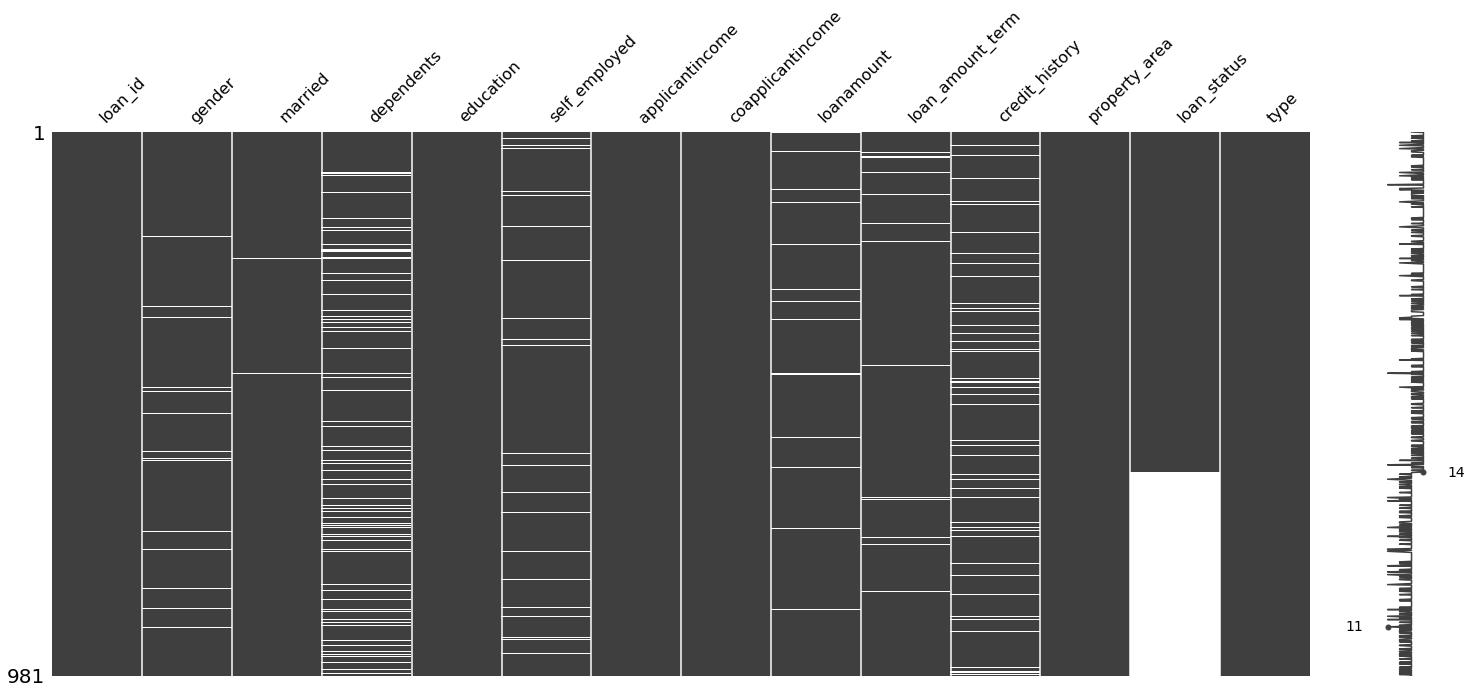

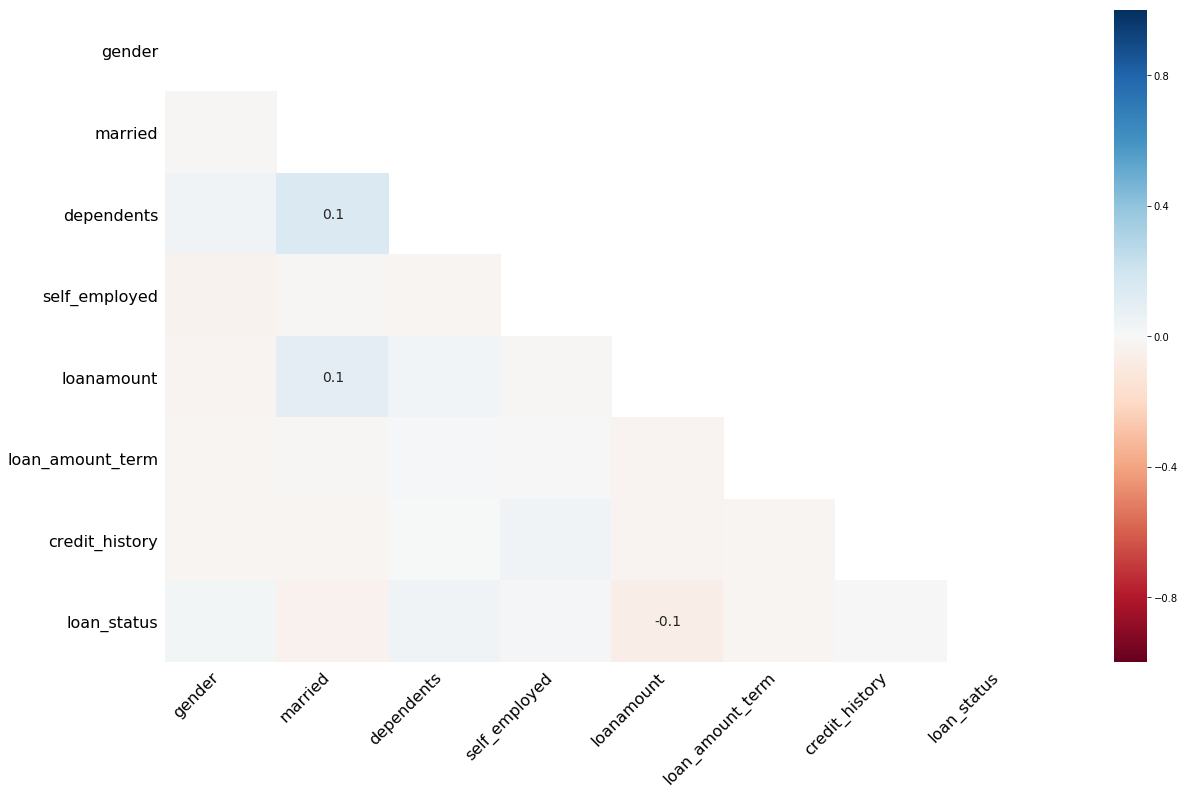

In [121]:
msno.matrix(comb),
msno.heatmap(comb)

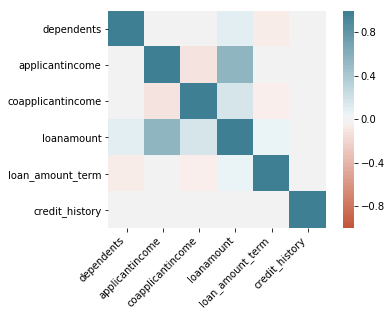

In [122]:
#corr plot
corr = comb.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

/Users/akailwoo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


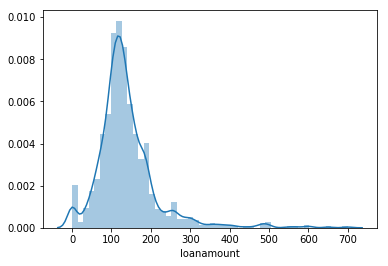

In [123]:
sns.distplot(comb.loanamount.fillna(0))

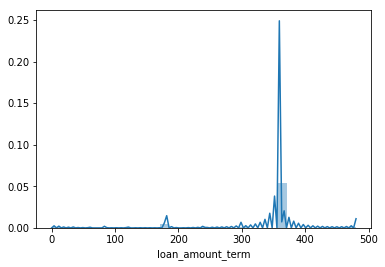

In [124]:
sns.distplot(comb.loan_amount_term.fillna(0))

In [125]:
comb.loan_amount_term.value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: loan_amount_term, dtype: int64

In [126]:
comb.credit_history.value_counts()

1.0    754
0.0    148
Name: credit_history, dtype: int64

In [127]:
#Imput missing data update 
comb1 = comb.copy()

In [128]:
comb1.loc[comb1.gender.isna(), 'gender' ] = 'Male'

In [129]:
comb1.loc[comb1.married.isna(), 'married' ] = 'Yes'

In [130]:
comb1.loc[(comb1.dependents.isna())&(comb1.married == 'Yes'), 'dependents' ] = 1
comb1.loc[(comb1.dependents.isna())&(comb1.married == 'No'), 'dependents' ] = 0

In [131]:
comb1.loc[comb1.self_employed.isna(), 'self_employed' ] = 'No'

In [132]:
comb1.loc[comb1.loanamount.isna(), 'loanamount' ] = 126
comb1.loc[comb1.loan_amount_term.isna(), 'loan_amount_term' ] = 360
comb1.loc[comb1.credit_history.isna(), 'credit_history' ] = 1

In [133]:
comb1.isna().sum()

loan_id                0
gender                 0
married                0
dependents             0
education              0
self_employed          0
applicantincome        0
coapplicantincome      0
loanamount             0
loan_amount_term       0
credit_history         0
property_area          0
loan_status          367
type                   0
dtype: int64

In [134]:
comb1['loan_status'] = comb1.loan_status.map(dict(Y=1, N=0))

In [135]:
#get dummies
comb1 = pd.get_dummies(comb1, columns = ['gender', 'married', 'self_employed', 'education', 'property_area'])

In [136]:
comb1.head()

,loan_id,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status,type,gender_Female,gender_Male,married_No,married_Yes,self_employed_No,self_employed_Yes,education_Graduate,education_Not Graduate,property_area_Rural,property_area_Semiurban,property_area_Urban
0,LP001002,0.0,5849,0.0,126.0,360.0,1.0,1.0,train,0,1,1,0,1,0,1,0,0,0,1
1,LP001003,1.0,4583,1508.0,128.0,360.0,1.0,0.0,train,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0.0,3000,0.0,66.0,360.0,1.0,1.0,train,0,1,0,1,0,1,1,0,0,0,1
3,LP001006,0.0,2583,2358.0,120.0,360.0,1.0,1.0,train,0,1,0,1,1,0,0,1,0,0,1
4,LP001008,0.0,6000,0.0,141.0,360.0,1.0,1.0,train,0,1,1,0,1,0,1,0,0,0,1


## modelling

In [147]:
x_train = comb1[comb1.type == 'train']
y_train = x_train['loan_status']
x_train.drop(['loan_id', 'loan_status','type'],axis=1,inplace=True)

x_test = comb1[comb1.type == 'test']
x_test.drop(['loan_id', 'loan_status','type'],axis=1,inplace=True)

/Users/akailwoo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [197]:
x_train = comb1[comb1.type == 'train']
x_train.drop(['loan_id','type'],axis=1,inplace=True)

x_test = comb1[comb1.type == 'test']
x_test.drop(['loan_id','type'],axis=1,inplace=True)

/Users/akailwoo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [356]:
x_train.shape, x_test.shape, y_train.shape, y_train.sum()

((614, 18), (367, 18), (614,), 422.0)

In [201]:
#from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
#from datetime import datetime
#from sklearn.svm import SVC
#from sklearn.utils.class_weight import compute_sample_weight
#import scikitplot as skplt
from sklearn.model_selection import StratifiedKFold

In [286]:
target = 'loan_status'

In [341]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['loan_status'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval = 5, seed = 0)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['loan_status'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.10g" % metrics.accuracy_score(dtrain['loan_status'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['loan_status'], dtrain_predprob))
                    
    feat_imp = pd.DataFrame([xgb1.feature_importances_], columns = x_train.drop(['loan_status'], axis = 1).columns).transpose()
    feat_imp.columns = ['feature_importance']
    feat_impt = feat_imp.sort_values(by = 'feature_importance', axis = 0, ascending = False, inplace = True)

    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.xlabel('')

In [368]:
def output(y_pred, map_data):
    data = pd.concat([map_data['loan_id'][map_data['type']=='test'].reset_index(drop = True), pd.Series(y_pred)], axis = 1)
    data.columns = ['Loan_ID', 'Loan_Status']
    data.Loan_Status = data.Loan_Status.map({1: 'Y', 0: 'N'})
    return data

In [348]:
xgb1.score(x_train[predictors],x_train['loan_status'])

0.8827361563517915

[0]	train-auc:0.72144+0.0685194	test-auc:0.671583+0.119104
[5]	train-auc:0.833682+0.0125135	test-auc:0.73541+0.0451363
[10]	train-auc:0.850328+0.00868889	test-auc:0.72518+0.0416922
[15]	train-auc:0.862548+0.00897827	test-auc:0.736471+0.0380688
[20]	train-auc:0.871007+0.00349292	test-auc:0.738838+0.0524821
[25]	train-auc:0.883719+0.00441795	test-auc:0.742504+0.0401696
[30]	train-auc:0.889502+0.00353885	test-auc:0.734861+0.0398941
[35]	train-auc:0.897161+0.00390208	test-auc:0.736196+0.0429933
[40]	train-auc:0.906007+0.00232408	test-auc:0.74165+0.0387026
[45]	train-auc:0.91029+0.00370956	test-auc:0.744005+0.0345874
[50]	train-auc:0.915957+0.00368624	test-auc:0.745355+0.0332712
[55]	train-auc:0.922615+0.00520531	test-auc:0.747778+0.0346234
[60]	train-auc:0.928611+0.00452785	test-auc:0.744566+0.0326966
[65]	train-auc:0.933232+0.00575639	test-auc:0.750107+0.0286754
[70]	train-auc:0.937733+0.00436637	test-auc:0.751761+0.0257662
[75]	train-auc:0.942888+0.00552607	test-auc:0.751928+0.029278
[80

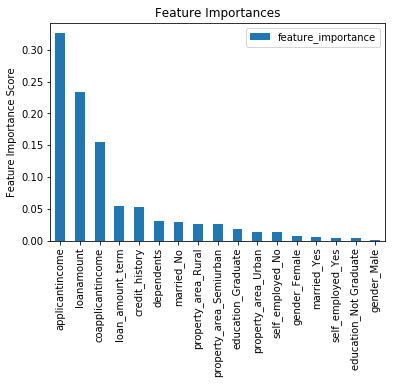

In [342]:
#Choose all predictors except target
predictors = [x for x in x_train.columns if x not in ['loan_status']]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=0, 
 silent = True)
modelfit(xgb1, x_train, predictors)

In [377]:
df = output(xgb1.predict(x_test[predictors]), comb1 )
df.to_csv('20190908_xgb_base_v1.csv',index=False)
#AUC = 0.777

In [379]:
#tune max_depth & min_child_weight first
#set n_estimators = 100

param_1 = {
 'max_depth':range(1,10,2),
 'min_child_weight':range(1,6,2)
 #'max_depth':[3],
 #'min_child_weight':[1]
 }
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=0), 
 param_grid = param_1, scoring='roc_auc',n_jobs=-1,verbose = True, cv=5)
gsearch1.fit(x_train[predictors],x_train[target])
gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 out of  75 | elapsed:    5.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    6.1s finished


({'max_depth': 7, 'min_child_weight': 5}, 0.7644280615093233)

In [ ]:
#Fix max_depth = 7, and min_child_weight =5

In [380]:
#tune gamma

param_2 = {
'gamma':[i/10.0 for i in range(0,5)]
 }
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=7,
 min_child_weight=5, gamma=1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=0), 
 param_grid = param_2, scoring='accuracy',n_jobs=-1,verbose = True, cv=5)
gsearch2.fit(x_train[predictors],x_train[target])
gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.5s finished


({'gamma': 0.3}, 0.7801302931596091)

In [ ]:
#GAMMA = 0.3 is the best score

[0]	train-auc:0.740617+0.0487083	test-auc:0.684398+0.0930728
[5]	train-auc:0.865279+0.00653907	test-auc:0.750498+0.0369381
[10]	train-auc:0.885676+0.00463902	test-auc:0.756919+0.0320509
[15]	train-auc:0.900996+0.00457761	test-auc:0.758882+0.0259412
[20]	train-auc:0.909065+0.00376246	test-auc:0.766373+0.0292618
[25]	train-auc:0.916213+0.0044767	test-auc:0.765378+0.028964
[30]	train-auc:0.921169+0.0038723	test-auc:0.765293+0.0263711
[35]	train-auc:0.926549+0.00318158	test-auc:0.763252+0.0283412
[40]	train-auc:0.931316+0.00399928	test-auc:0.761998+0.0231714
[45]	train-auc:0.93378+0.00455695	test-auc:0.758754+0.0226849
[50]	train-auc:0.936565+0.00420384	test-auc:0.756359+0.0232195
[55]	train-auc:0.939328+0.00509638	test-auc:0.755054+0.0208394
[60]	train-auc:0.943235+0.00440191	test-auc:0.757262+0.0208269
[65]	train-auc:0.945868+0.00353816	test-auc:0.759056+0.021849
[70]	train-auc:0.948096+0.00380969	test-auc:0.759251+0.0229242
[75]	train-auc:0.950717+0.00309129	test-auc:0.760853+0.0204737


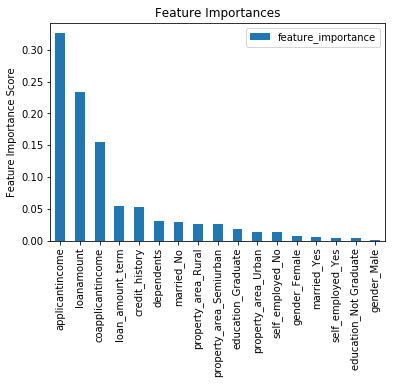

In [381]:
#rechecking the model with new parameters now
#Choose all predictors except target
predictors = [x for x in x_train.columns if x not in ['loan_status']]
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=7,
 min_child_weight=5,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=0, 
 silent = True)
modelfit(xgb2, x_train, predictors)

In [382]:
df1 = output(xgb2.predict(x_test[predictors]), comb1 )
df1.to_csv('20190908_xgb_wip_v2.csv',index=False)
#AUC = 0.7847222

In [384]:
#tune subsample and colsample_bytree

#set gamma = 0.3

param_3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
 }
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=7,
 min_child_weight=5, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=0), 
 param_grid = param_3, scoring='accuracy',n_jobs=-1,verbose = True, cv=5)
gsearch3.fit(x_train[predictors],x_train[target])
gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.8s finished


({'colsample_bytree': 0.9, 'subsample': 0.9}, 0.7817589576547231)

In [385]:
#0.9 are the best values. again run but at 0.5 interval

param_4 = {
 'subsample':[i/100.0 for i in range(85,95,5)],
 'colsample_bytree':[i/100.0 for i in range(85,95,5)]
 }
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=7,
 min_child_weight=5, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=0), 
 param_grid = param_4, scoring='accuracy',n_jobs=-1,verbose = True, cv=5)
gsearch4.fit(x_train[predictors],x_train[target])
gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.0s finished


({'colsample_bytree': 0.9, 'subsample': 0.85}, 0.7931596091205212)

In [ ]:
#best values are 
#subsample: 0.85
#colsample_bytree: 0.9

In [435]:
#Tuning Regularization parameters now

param_5 = {
 'reg_alpha':[1e-5, 1e-2, 0,0.1, 1, 10, 100, 200]
 }

gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=7,
 min_child_weight=5, gamma=0.3, subsample=0.85, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=0), 
 param_grid = param_5, scoring='accuracy',n_jobs=-1,verbose = True, cv=5)
gsearch5.fit(x_train[predictors],x_train[target])
gsearch5.best_params_, gsearch5.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.3s finished


({'reg_alpha': 10}, 0.8094462540716613)

In [449]:
#Try closer values now

param_6 = {
 'reg_alpha':[0,1, 10, 20, 50]
 }

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=7,
 min_child_weight=5, gamma=0.3, subsample=0.85, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=0), 
 param_grid = param_6, scoring='accuracy',n_jobs=-1,verbose = True, cv=5, return_train_score =True)
gsearch6.fit(x_train[predictors],x_train[target])
gsearch6.best_params_, gsearch6.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.1s finished
/Users/akailwoo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


({'reg_alpha': 10}, 0.8094462540716613)

In [450]:
 gsearch6.cv_results_

{'mean_fit_time': array([0.42423859, 0.39310999, 0.25361524, 0.20834503, 0.24312286]),
 'std_fit_time': array([0.03035709, 0.0547825 , 0.01542803, 0.00425417, 0.0312637 ]),
 'mean_score_time': array([0.00381527, 0.00425382, 0.0024538 , 0.0067914 , 0.00213079]),
 'std_score_time': array([1.04247618e-04, 6.69812554e-04, 7.84838329e-05, 9.09237140e-03,
        3.85444627e-04]),
 'param_reg_alpha': masked_array(data=[0, 1, 10, 20, 50],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'reg_alpha': 0},
  {'reg_alpha': 1},
  {'reg_alpha': 10},
  {'reg_alpha': 20},
  {'reg_alpha': 50}],
 'split0_test_score': array([0.78225806, 0.78225806, 0.81451613, 0.81451613, 0.81451613]),
 'split1_test_score': array([0.75806452, 0.75806452, 0.76612903, 0.76612903, 0.76612903]),
 'split2_test_score': array([0.80327869, 0.77868852, 0.78688525, 0.78688525, 0.68852459]),
 'split3_test_score': array([0.85245902, 0.83606557, 0.86065574, 0.86

[0]	train-auc:0.668683+0.0846043	test-auc:0.656622+0.0856491
[5]	train-auc:0.768393+0.0115908	test-auc:0.701379+0.0297256
[10]	train-auc:0.785582+0.00780802	test-auc:0.708898+0.0206371
[15]	train-auc:0.800714+0.00714858	test-auc:0.724476+0.0224035
[20]	train-auc:0.806242+0.0073393	test-auc:0.73217+0.0168082
[25]	train-auc:0.812963+0.00695636	test-auc:0.734573+0.0213105
[30]	train-auc:0.817209+0.00689402	test-auc:0.736642+0.0211548
[35]	train-auc:0.820383+0.00496207	test-auc:0.738114+0.0246401
[40]	train-auc:0.821748+0.00477081	test-auc:0.738713+0.0224272
[45]	train-auc:0.823329+0.00498408	test-auc:0.738176+0.0239566
[50]	train-auc:0.823643+0.00517173	test-auc:0.738162+0.025573
[55]	train-auc:0.82527+0.00589291	test-auc:0.739905+0.0245406
[60]	train-auc:0.826014+0.00592846	test-auc:0.74045+0.0246612
[65]	train-auc:0.827038+0.0060069	test-auc:0.739038+0.0269818
[70]	train-auc:0.827944+0.00625606	test-auc:0.740228+0.0255671
[75]	train-auc:0.828957+0.00676806	test-auc:0.740933+0.0255096
[8

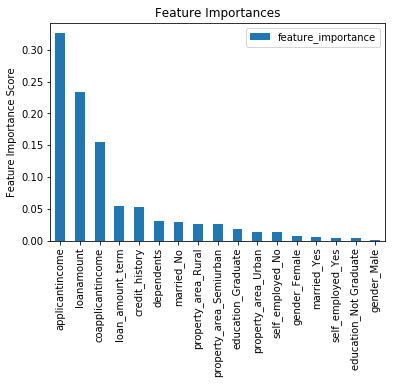

In [451]:
#retrain the model

#Choose all predictors except target
predictors = [x for x in x_train.columns if x not in ['loan_status']]
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=7,
 min_child_weight=5,
 gamma=0.3,
 subsample=0.85,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 reg_alpha = 10,
 seed=0, 
 silent = True)
modelfit(xgb3, x_train, predictors)

In [452]:
df2 = output(xgb3.predict(x_test[predictors]), comb1 )
df2.to_csv('20190908_xgb_wip_v4.csv',index=False)
#AUC = 0.777
#score has gone down, need to reduce the reg strength
#2nd iteration: reg has reduced the score, so we will not use it

[0]	train-auc:0.740617+0.0487083	test-auc:0.684398+0.0930728
[5]	train-auc:0.860316+0.00657609	test-auc:0.748356+0.031789
[10]	train-auc:0.880824+0.00374752	test-auc:0.747733+0.0286448
[15]	train-auc:0.892226+0.00209475	test-auc:0.756705+0.0261693
[20]	train-auc:0.900459+0.00309705	test-auc:0.754831+0.0320322
[25]	train-auc:0.904735+0.00465286	test-auc:0.757128+0.0285709
[30]	train-auc:0.909539+0.00545354	test-auc:0.757925+0.0282263
[35]	train-auc:0.912798+0.00636714	test-auc:0.761863+0.0267063
[40]	train-auc:0.915427+0.00578837	test-auc:0.762148+0.0296107
[45]	train-auc:0.917639+0.00490487	test-auc:0.762382+0.0299703
[50]	train-auc:0.919565+0.00455574	test-auc:0.762236+0.0289896
[55]	train-auc:0.923126+0.00468398	test-auc:0.762323+0.0263053
[60]	train-auc:0.924295+0.0044999	test-auc:0.76214+0.0265713
[65]	train-auc:0.926312+0.00375628	test-auc:0.764762+0.0241739
[70]	train-auc:0.928263+0.00383361	test-auc:0.763441+0.0239068
[75]	train-auc:0.929765+0.00369866	test-auc:0.764995+0.024121

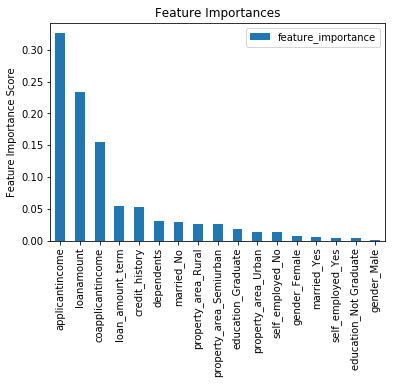

In [470]:
#reduce learning rate & increase # trees

#Choose all predictors except target
predictors = [x for x in x_train.columns if x not in ['loan_status']]
xgb4 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=5,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=0, 
 silent = True)
modelfit(xgb4, x_train, predictors)

In [465]:
df3 = output(xgb4.predict(x_test[predictors]), comb1 )
df3.to_csv('20190908_xgb_full_v6.csv',index=False)
